In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
import numpy as np
from scipy.stats import skew, kurtosis

Load data

In [28]:
df = pd.read_csv('Data/results/video_data_final.csv')
df = pd.read_csv('video_data_final (128vids).csv')

# Feature engineer
# Maybe normalize or log transform view_deviation
df['published_at'] = pd.to_datetime(df['published_at'])
df['hour'] = df['published_at'].dt.hour
df['day_of_week'] = df['published_at'].dt.dayofweek
#df['month'] = df['published_at'].dt.month # Not useful because month can not really be influenced by Youtuber
df['duration_minutes'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds() / 60)

# Remove useless String Columns
df = df.drop(columns=['video_id', 'video_title', 'published_at', 'video_url', 'playlist_id', 'channel_title', 'playlist_name'])

In [29]:
# skrew and kurtosis
for col in df.select_dtypes(include='number').columns:
    print(f'{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}')


views: Skewness = 8.56, Kurtosis = 82.99
likes: Skewness = 5.22, Kurtosis = 35.18
comments: Skewness = 2.69, Kurtosis = 10.49
angry: Skewness = 0.85, Kurtosis = 1.06
disgust: Skewness = 2.87, Kurtosis = 13.00
fear: Skewness = 2.06, Kurtosis = 9.26
happy: Skewness = 0.59, Kurtosis = 0.49
sad: Skewness = 0.47, Kurtosis = -0.17
surprise: Skewness = 1.63, Kurtosis = 3.27
neutral: Skewness = 0.61, Kurtosis = 1.91
pct_with_face: Skewness = 1.14, Kurtosis = 1.52
brightness: Skewness = -0.32, Kurtosis = 0.78
mean_r: Skewness = -0.22, Kurtosis = 0.75
mean_g: Skewness = -0.26, Kurtosis = 0.77
mean_b: Skewness = -0.05, Kurtosis = 0.83
blurriness: Skewness = 2.12, Kurtosis = 6.71
title is plain: Skewness = 0.28, Kurtosis = -0.43
title is emotionally touching: Skewness = 0.97, Kurtosis = 1.16
title is exaggerated: Skewness = 0.78, Kurtosis = 0.21
hour: Skewness = -1.63, Kurtosis = 4.76
day_of_week: Skewness = 0.37, Kurtosis = -0.81
duration_minutes: Skewness = 1.42, Kurtosis = 5.91


In [30]:
# Basic structure
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   views                          128 non-null    int64  
 1   likes                          128 non-null    int64  
 2   comments                       128 non-null    int64  
 3   duration                       128 non-null    object 
 4   angry                          128 non-null    float64
 5   disgust                        128 non-null    float64
 6   fear                           128 non-null    float64
 7   happy                          128 non-null    float64
 8   sad                            128 non-null    float64
 9   surprise                       128 non-null    float64
 10  neutral                        128 non-null    float64
 11  pct_with_face                  128 non-null    float64
 12  brightness                     128 non-null    flo

In [31]:
df['log_views'] = np.log1p(df['views'])
df['log_view_deviation'] = df['log_views'] - df['log_views'].mean()

if 'views' in df.columns:
    df = df.drop(columns=['views'])

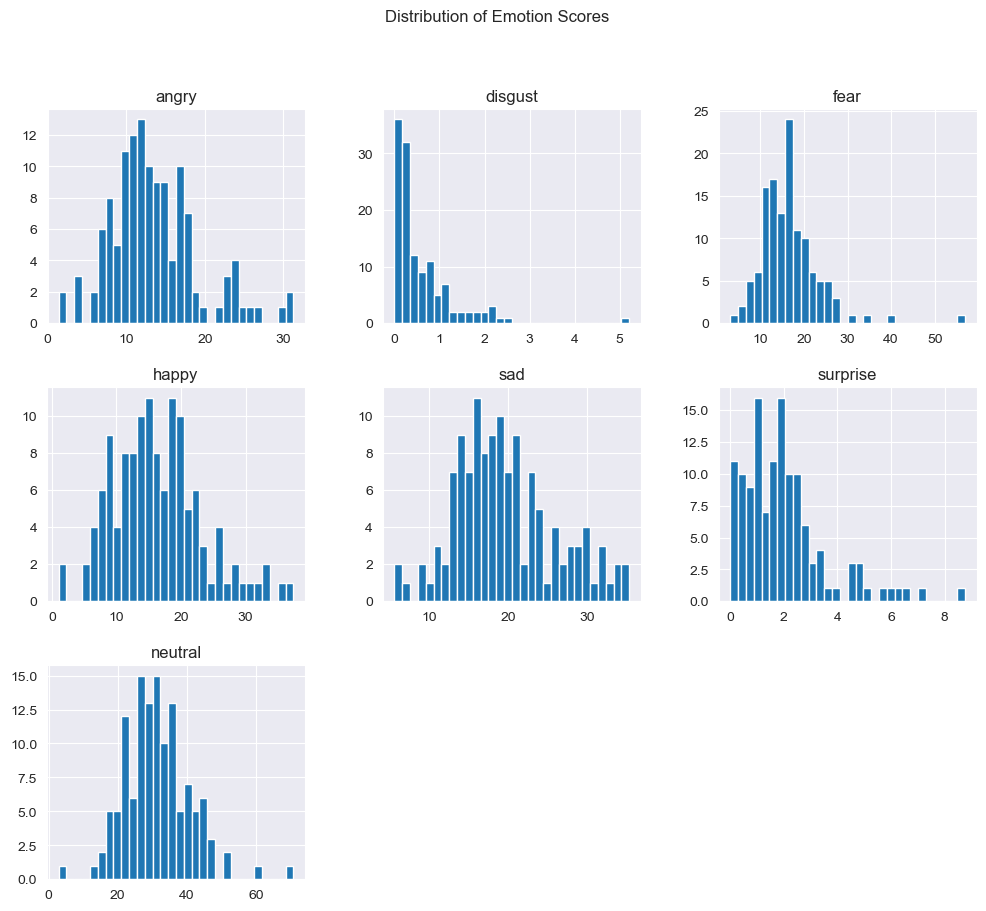

In [32]:
#Distribution of Emotion Scores
emotion_cols = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
df[emotion_cols].hist(bins=30, figsize=(12, 10), layout=(3, 3))
plt.suptitle('Distribution of Emotion Scores')
plt.show()


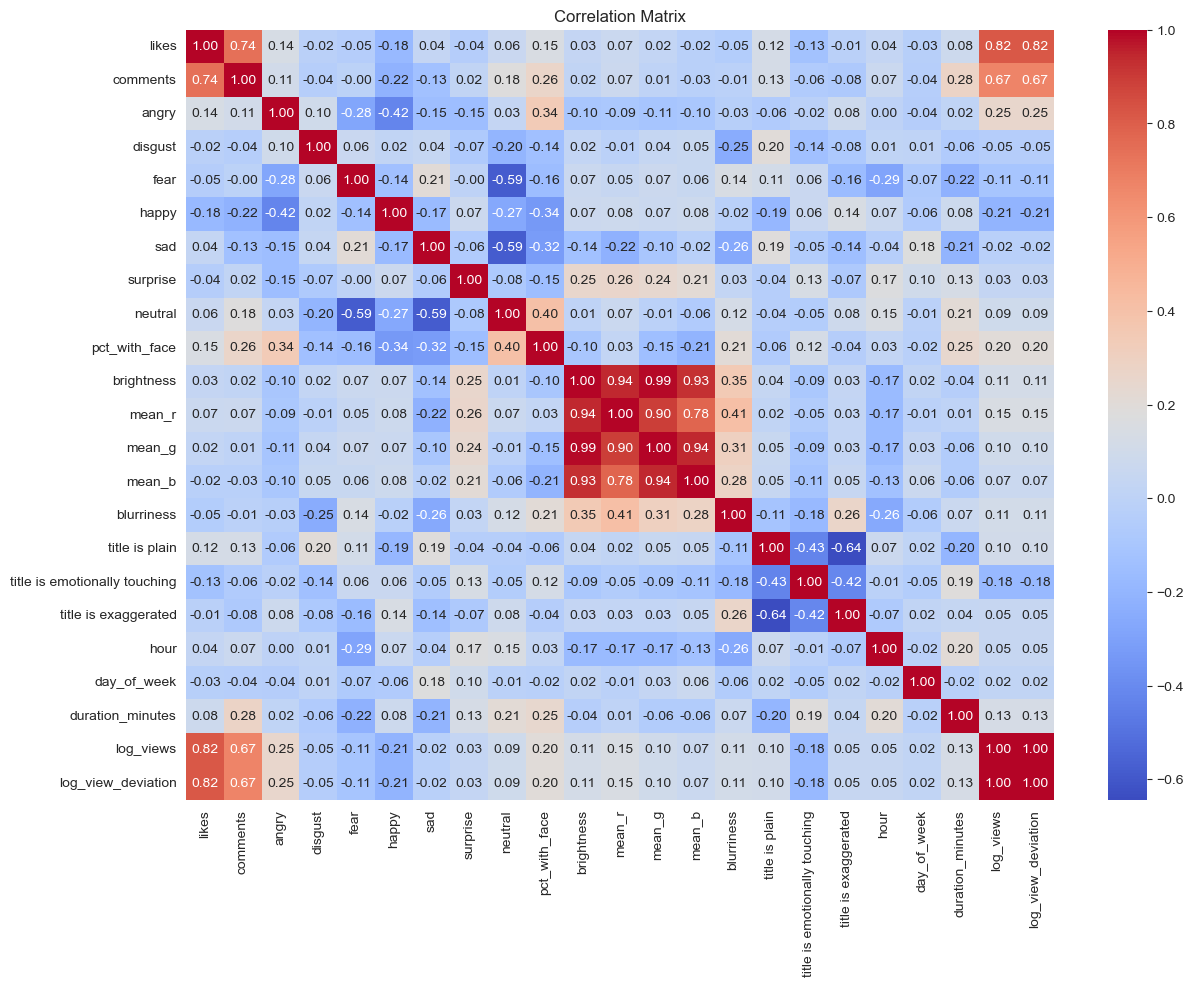

In [33]:
# Correlation of all numeric variables
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


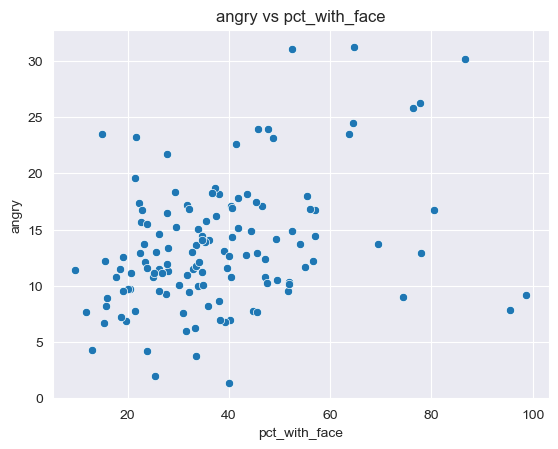

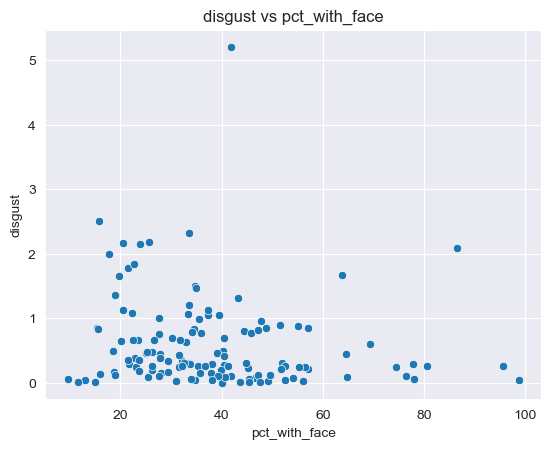

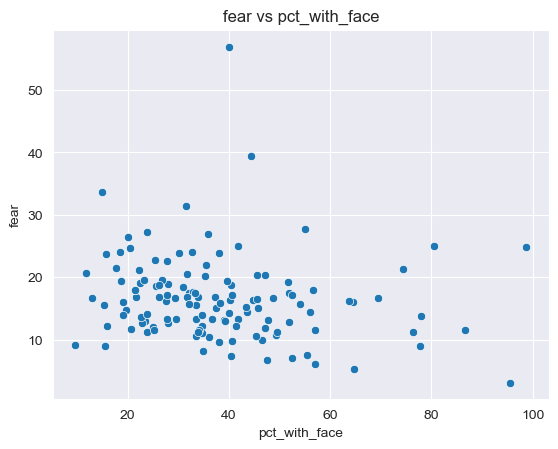

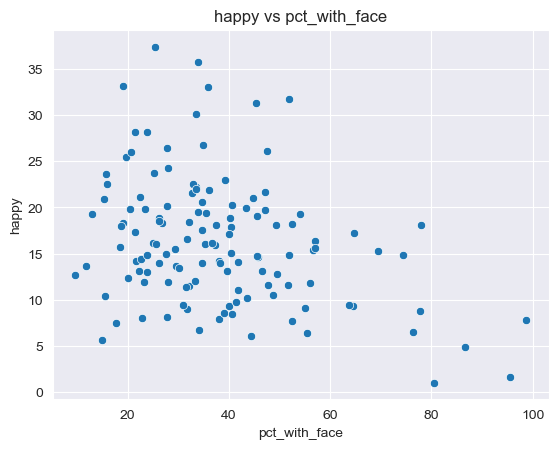

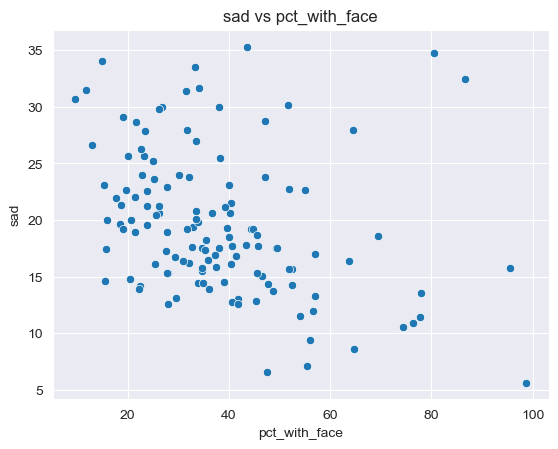

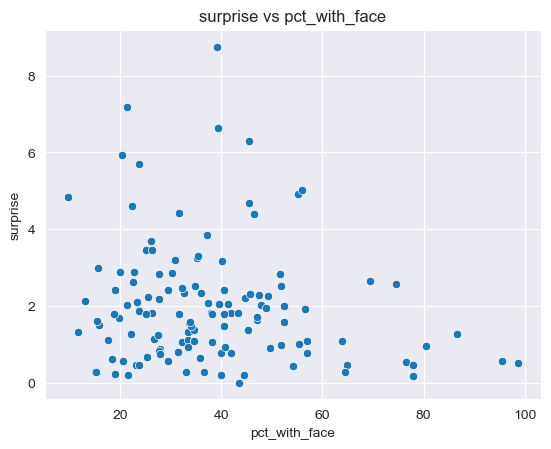

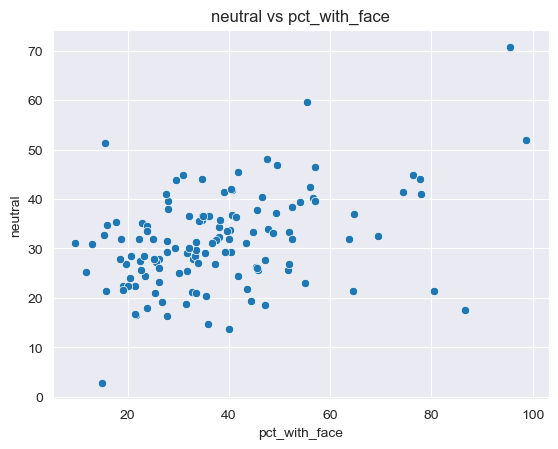

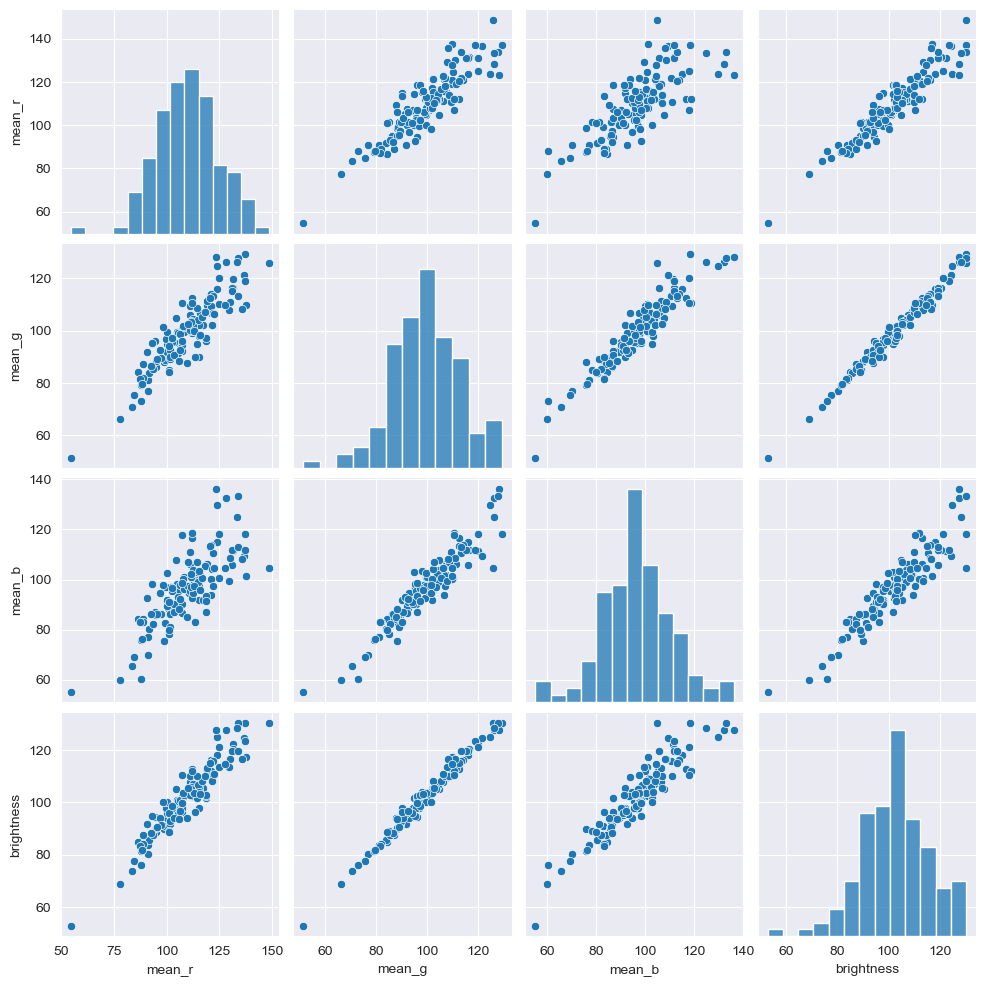

In [34]:
# pct_with_face vs emotion scores
for col in emotion_cols:
    sns.scatterplot(x='pct_with_face', y=col, data=df)
    plt.title(f'{col} vs pct_with_face')
    plt.show()

# brightness vs mean RGB
rgb_cols = ['mean_r', 'mean_g', 'mean_b']
sns.pairplot(df[rgb_cols + ['brightness']])


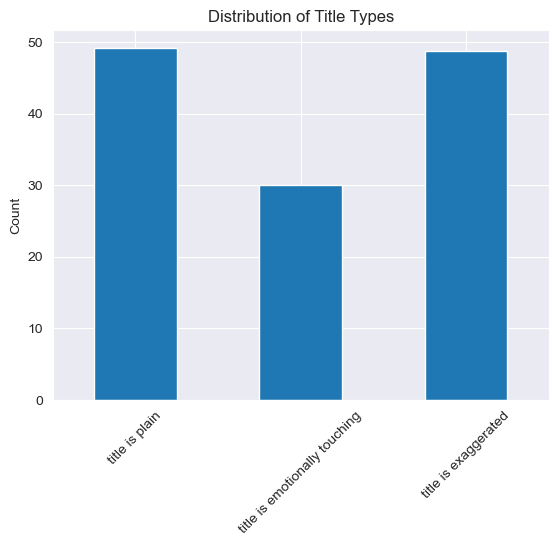

In [35]:
title_cols = ['title is plain', 'title is emotionally touching', 'title is exaggerated']

# Count of each title type
df[title_cols].sum().plot(kind='bar')
plt.title('Distribution of Title Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


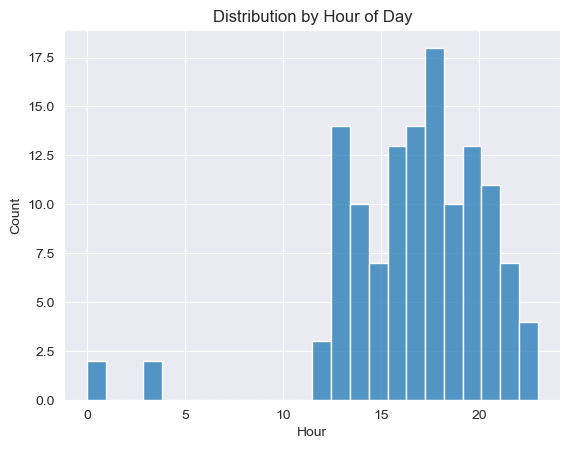

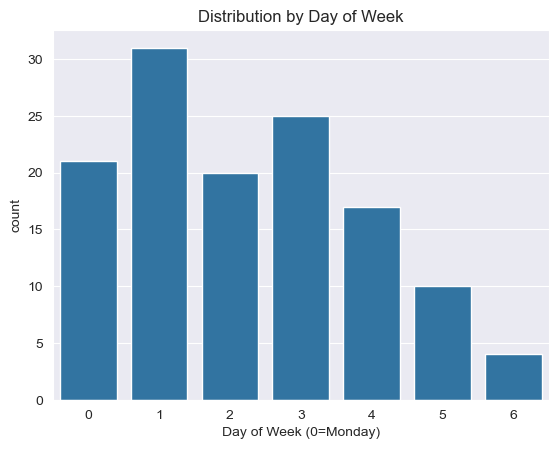

In [36]:
# Hour of upload
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Distribution by Hour of Day')
plt.xlabel('Hour')
plt.show()

# Day of week
sns.countplot(x='day_of_week', data=df, order=range(7))
plt.title('Distribution by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.show()


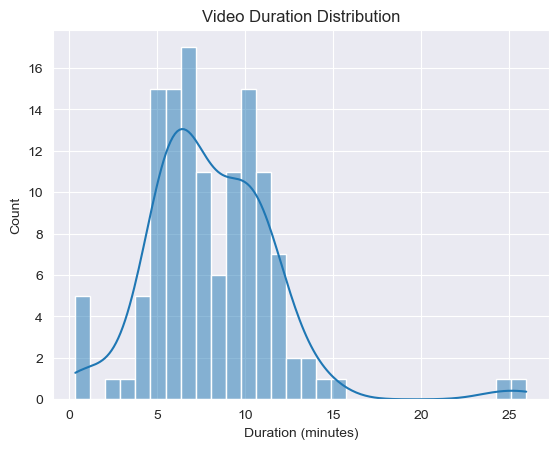

In [37]:
# Duration Analysis
sns.histplot(df['duration_minutes'], bins=30, kde=True)
plt.title('Video Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()


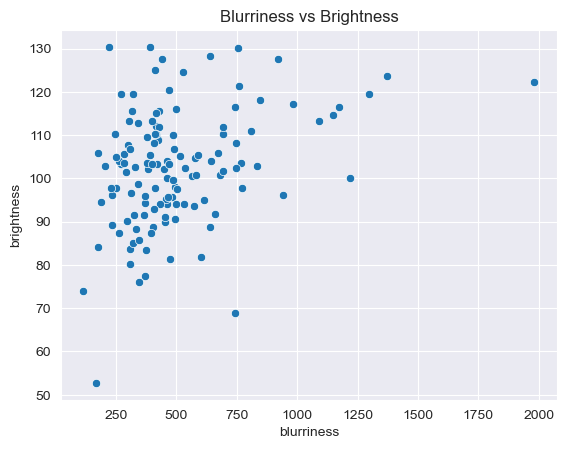

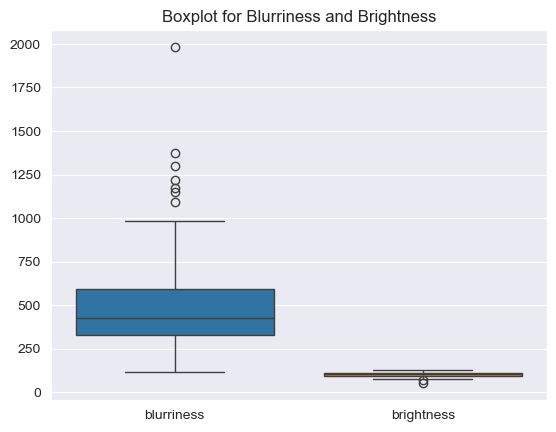

In [38]:
# Blur vs Brightness
sns.scatterplot(x='blurriness', y='brightness', data=df)
plt.title('Blurriness vs Brightness')
plt.show()

# Boxplot for outlier detection
sns.boxplot(data=df[['blurriness', 'brightness']])
plt.title('Boxplot for Blurriness and Brightness')
plt.show()
